In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

In [4]:
def get_reconstruction(eigenvectors, Mean, x):
    # Compute the projection of the data on the top eigen-vectors
    Eig= np.matrix(eigenvectors)
    #
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

In [5]:
def display_reconstruction(eigs, mean, arr, label_format):
    rec= get_reconstruction(eigs, mean, arr)
    m_orig_x= rec[0]
    m_rec= rec[1]

    fig, ax= plt.subplots(figsize=figsize)
    ax.plot(m_orig_x, c='g', label='orig')
    ax.plot(m_rec, c='b', label='recon')
    #
    set_xaxis(ax, len(m_rec))
    rmse= np.sqrt(mean_squared_error(m_orig_x, m_rec))
    label= label_format + '_RMSE_{}'.format(rmse)
    ax.set_title(label)
    ax.legend()
    ax.set_xlabel("time")

In [6]:
def get_reconstruction_from_projection(eigenvectors, Mean, m_projection):
    Eig= np.matrix(eigenvectors)
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    return np.ravel(rec)

In [7]:
def display_reconstruction_from_projection(eigs, mean, m_projection, label):
    rec= get_reconstruction_from_projection(eigs, mean, m_projection)

    fig, ax= plt.subplots(figsize=figsize)
    ax.plot(rec, c='b', label='recon')
    #
    set_xaxis(ax, len(rec))
    ax.set_title(label)
    ax.legend()
    ax.set_xlabel("time")

In [8]:
figsize= (16,8)

# Reconstruction on Top Eigenvectors with Root Mean Square Error

In [9]:
partitions= ['weekday', 'weekend']
years= [2008, 2009, 2010, 2011, 2013, 2014, 2015]

base_mean_path= './data/{}/total_flow_{}_mean_vector.pivot_{}_grouping_pca_tmp.csv'
base_eigs_path= './data/{}/total_flow_{}_eigenvectors.pivot_{}_grouping_pca_tmp.csv'
base_samples_path= './data/{}/total_flow_{}_samples.pivot_{}_grouping_pca_tmp.csv'

/home/dyerke/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


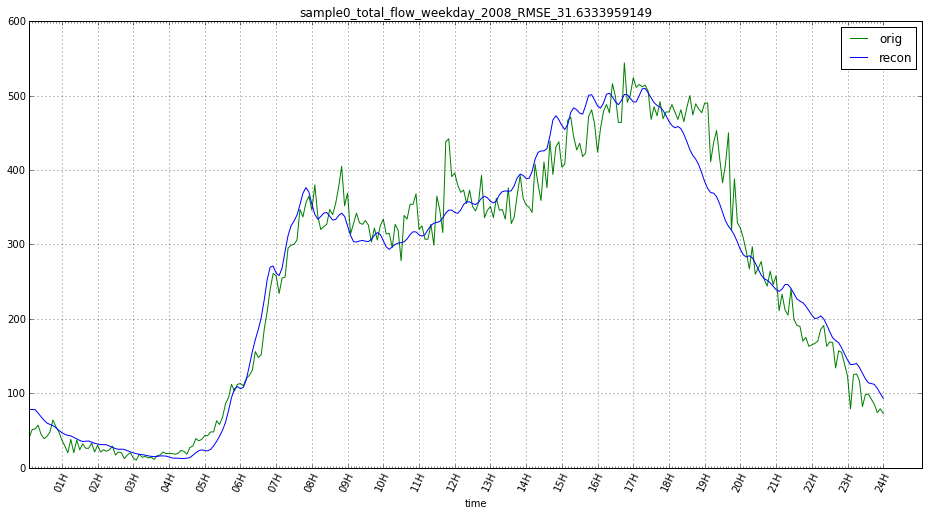

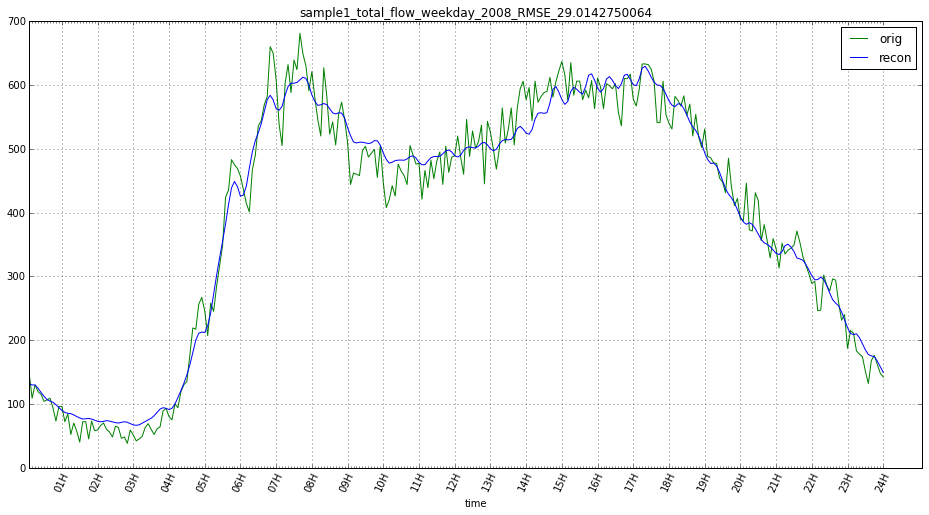

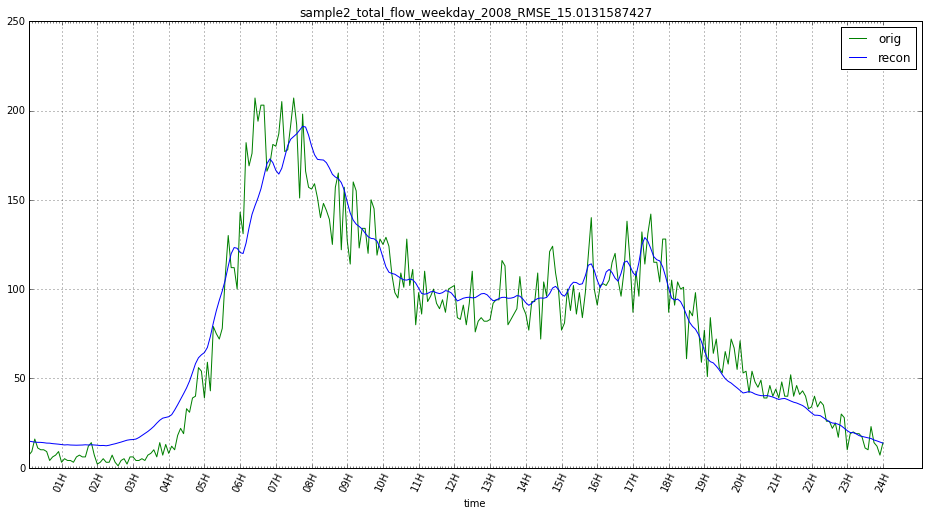

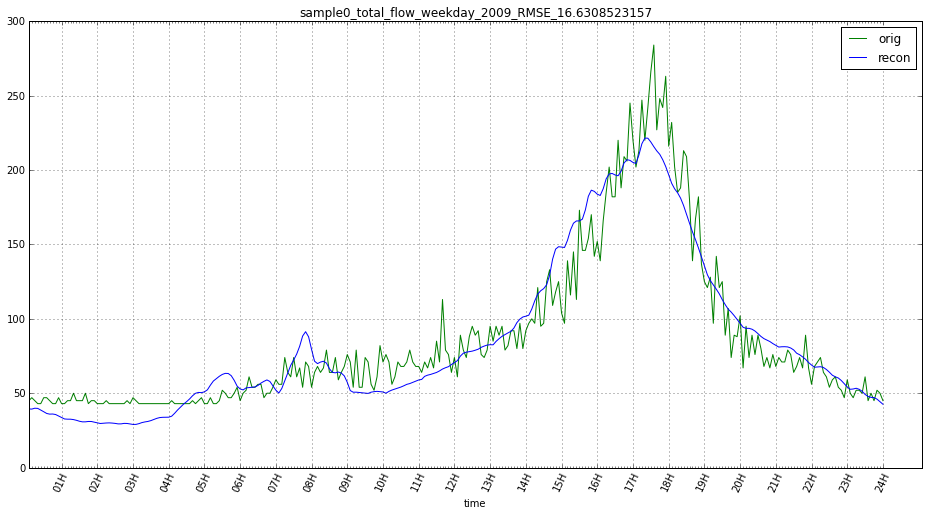

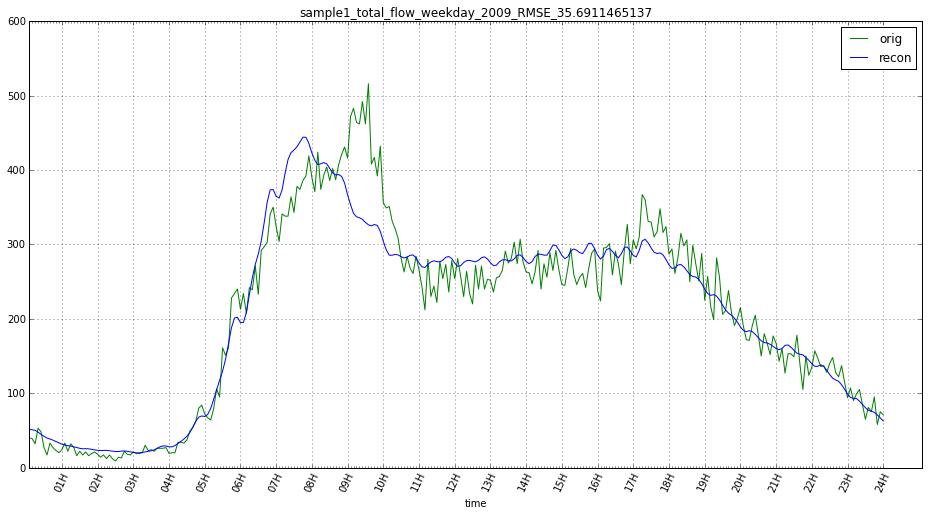

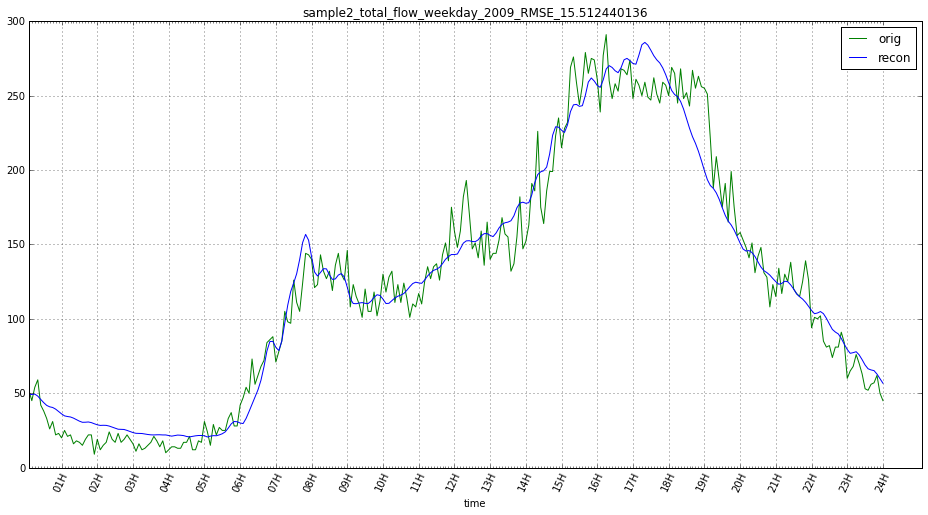

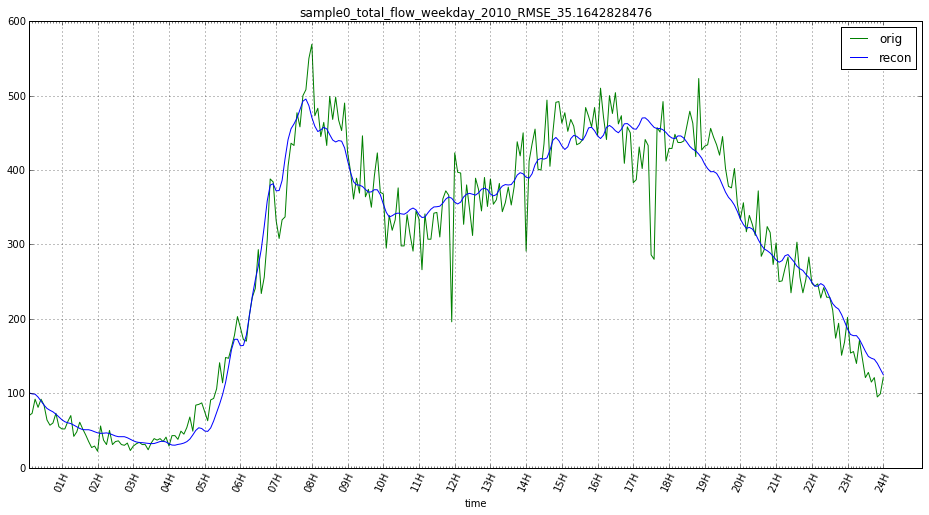

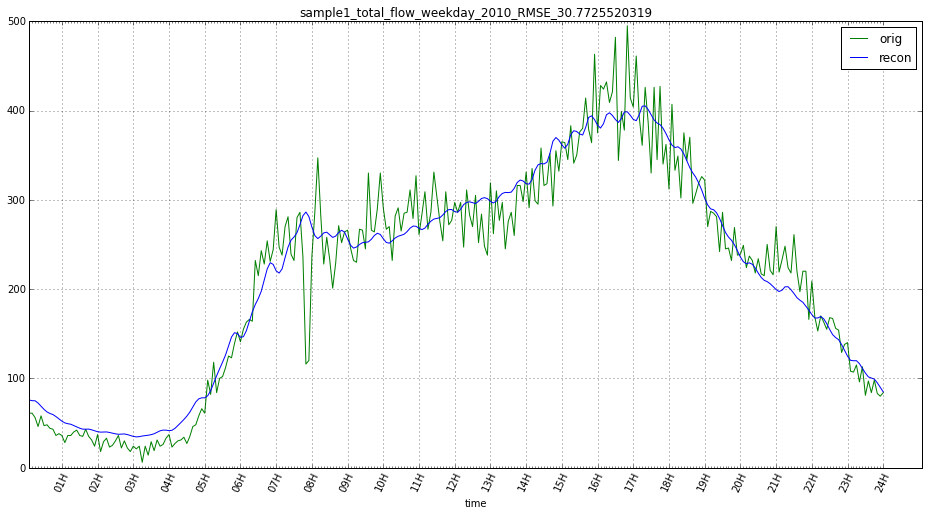

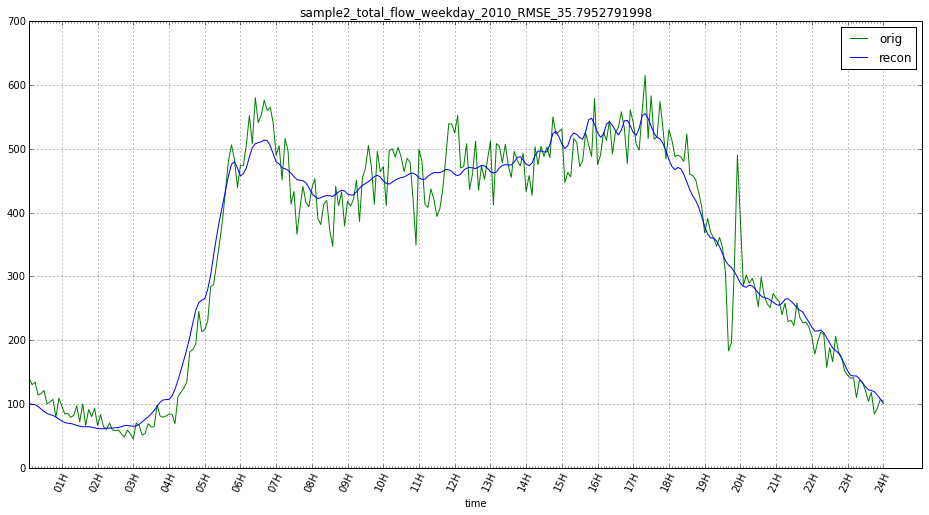

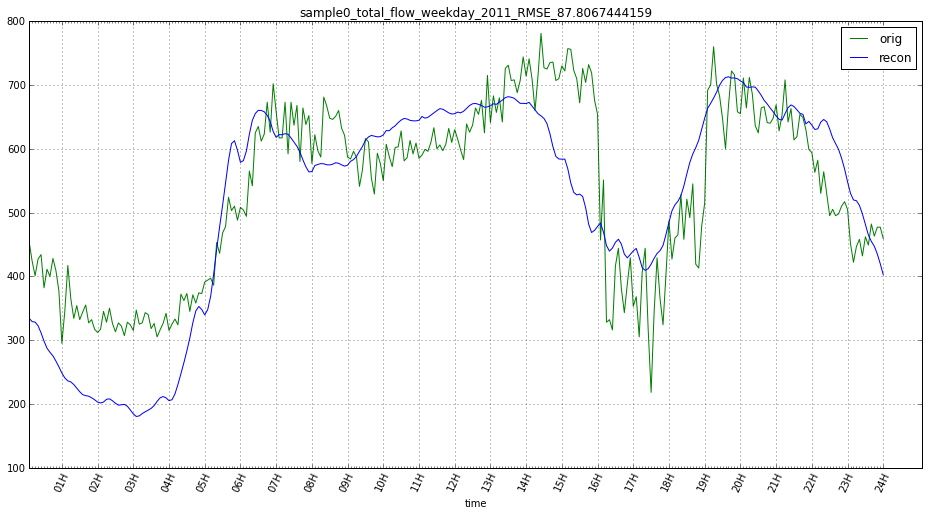

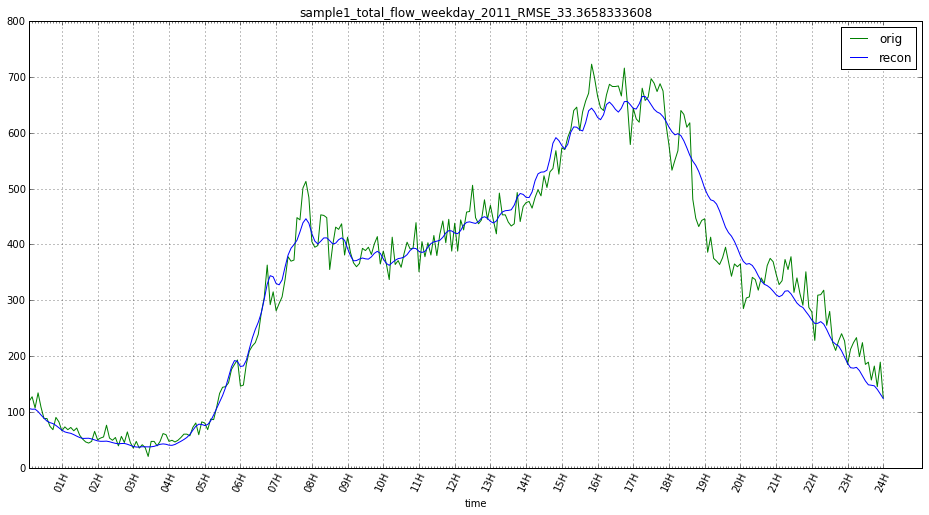

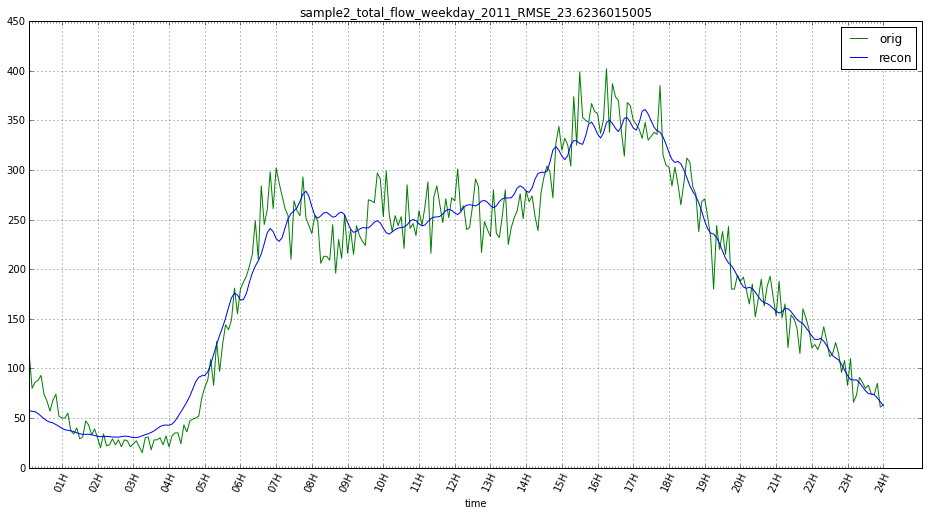

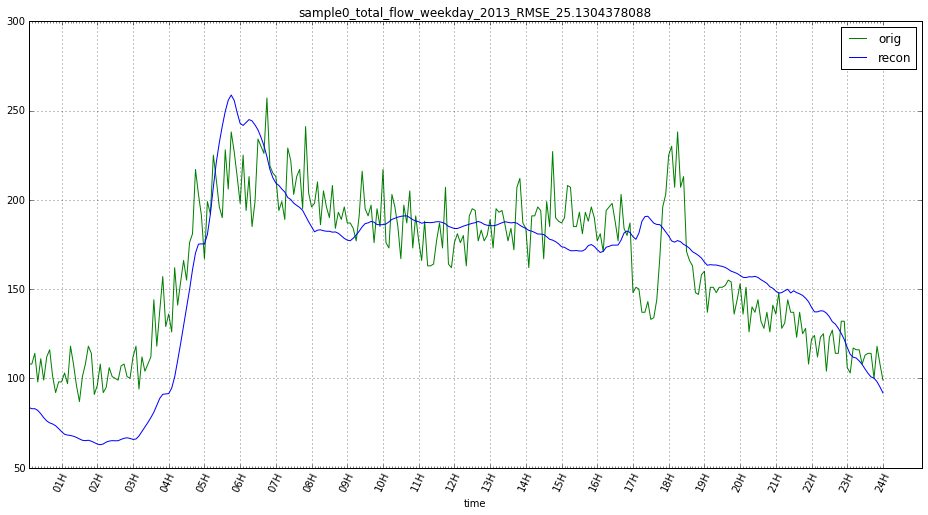

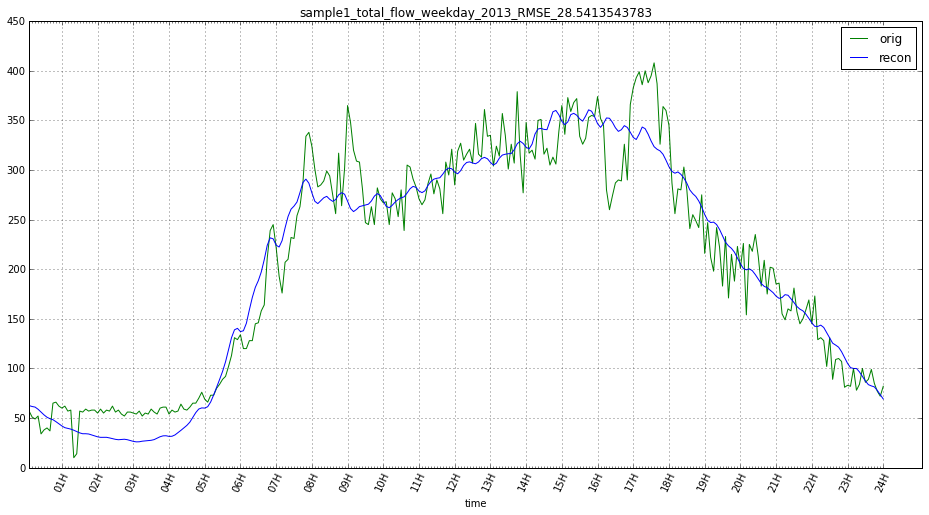

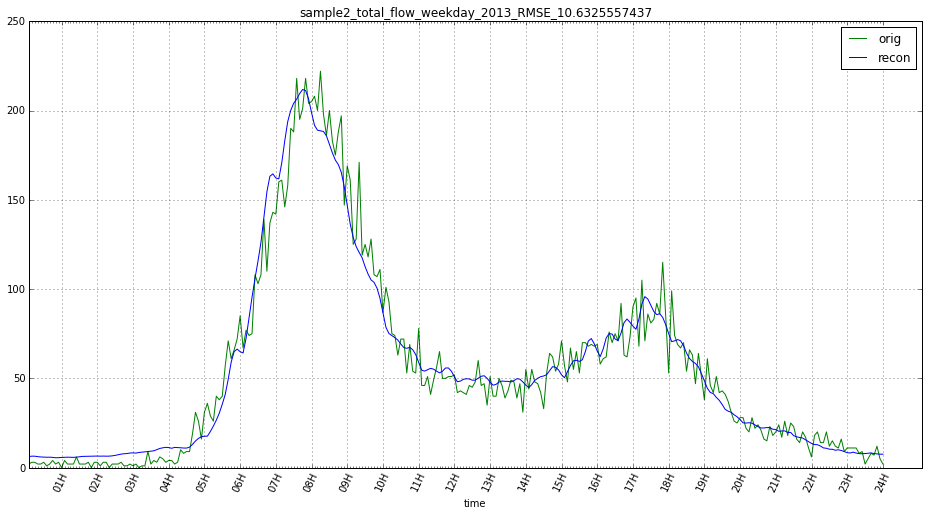

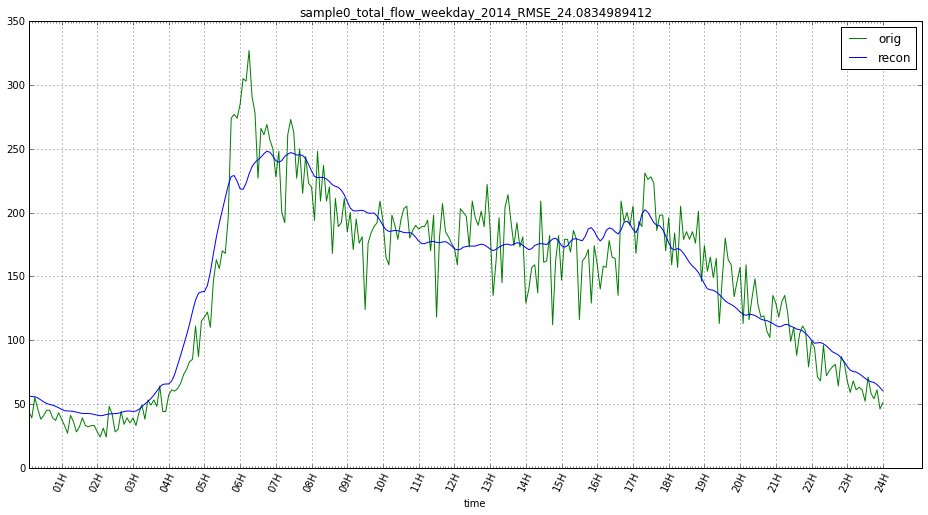

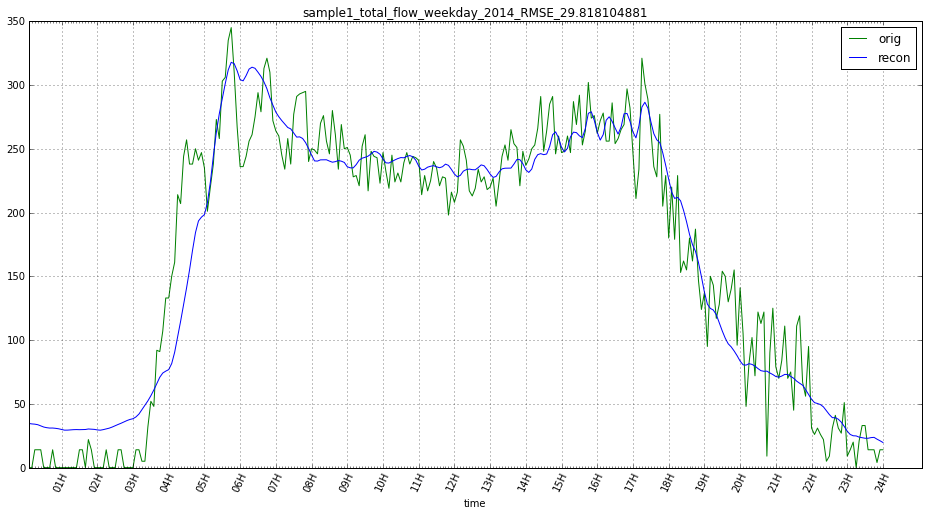

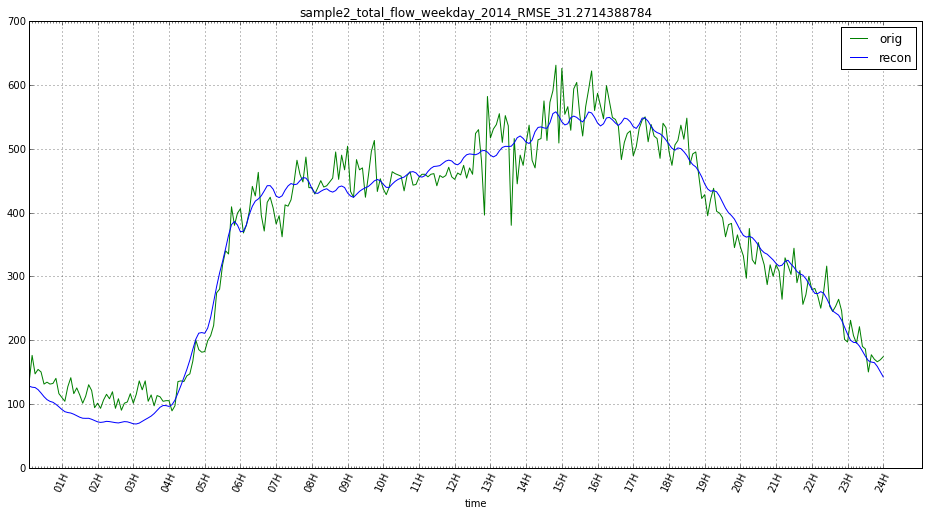

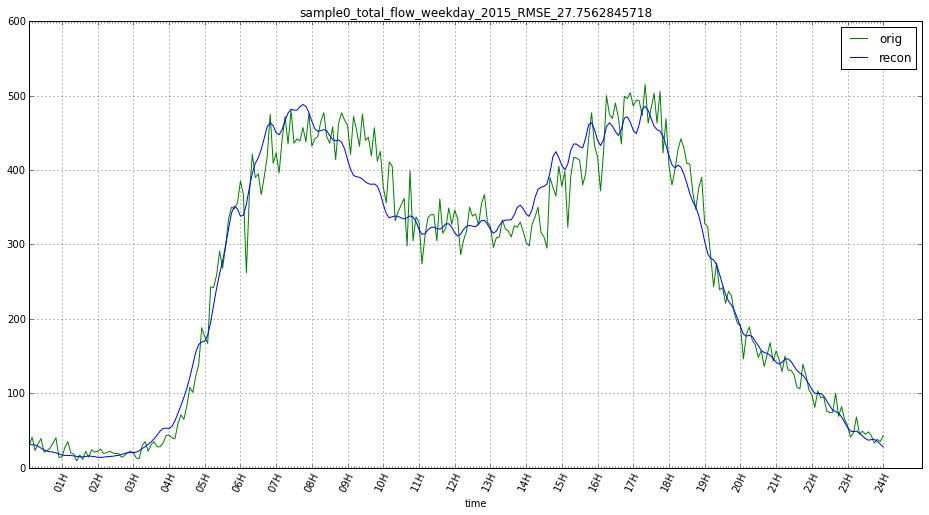

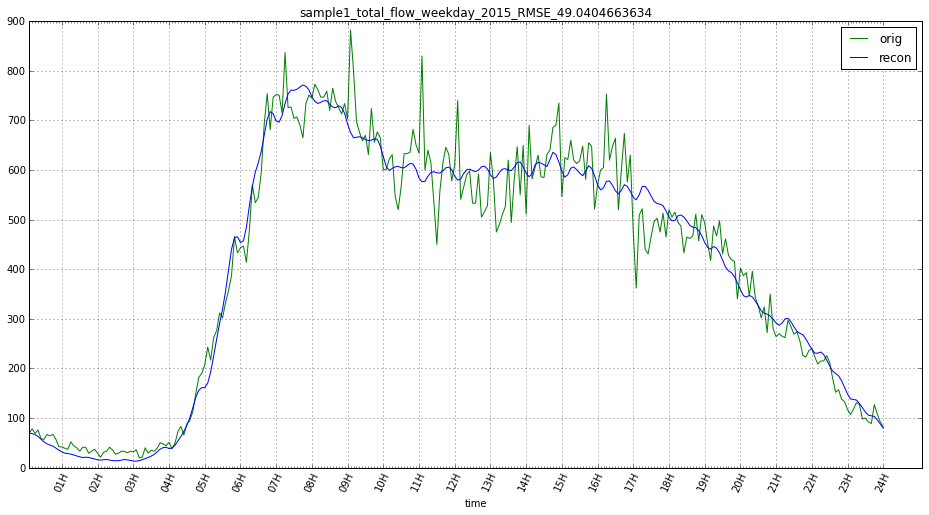

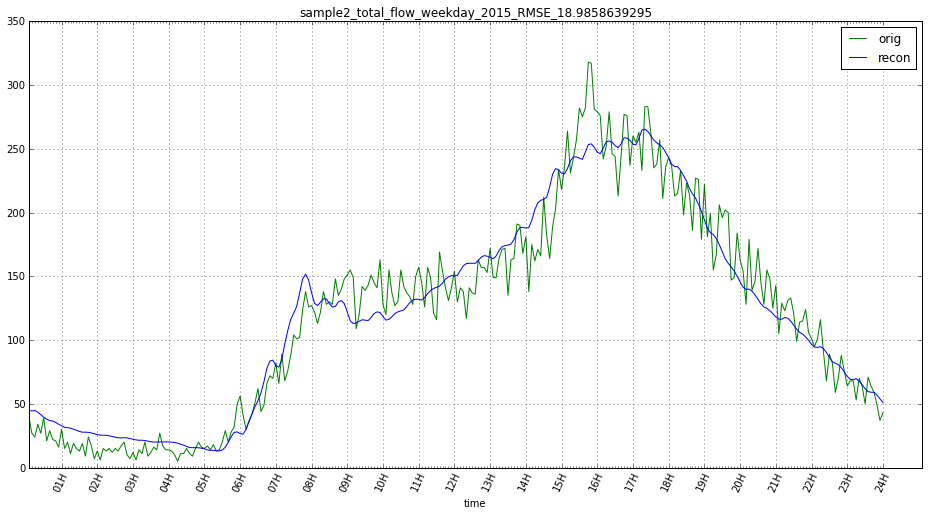

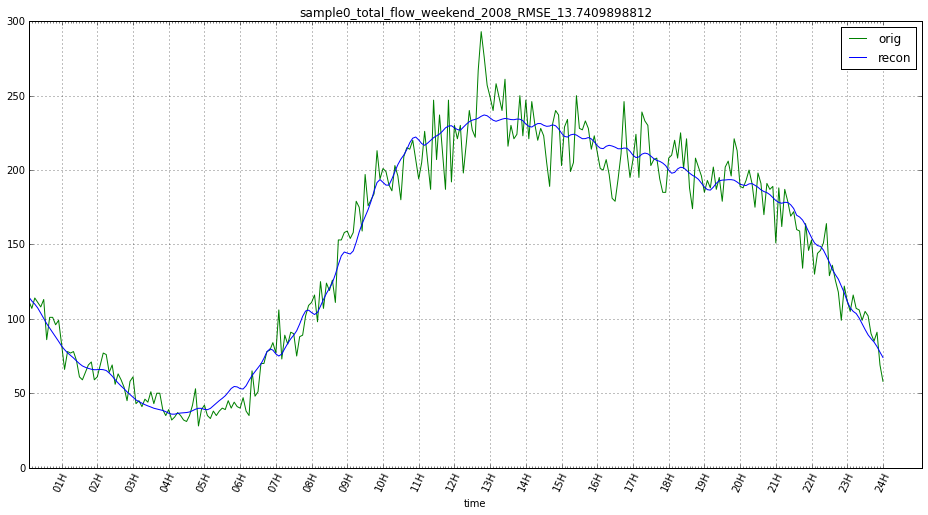

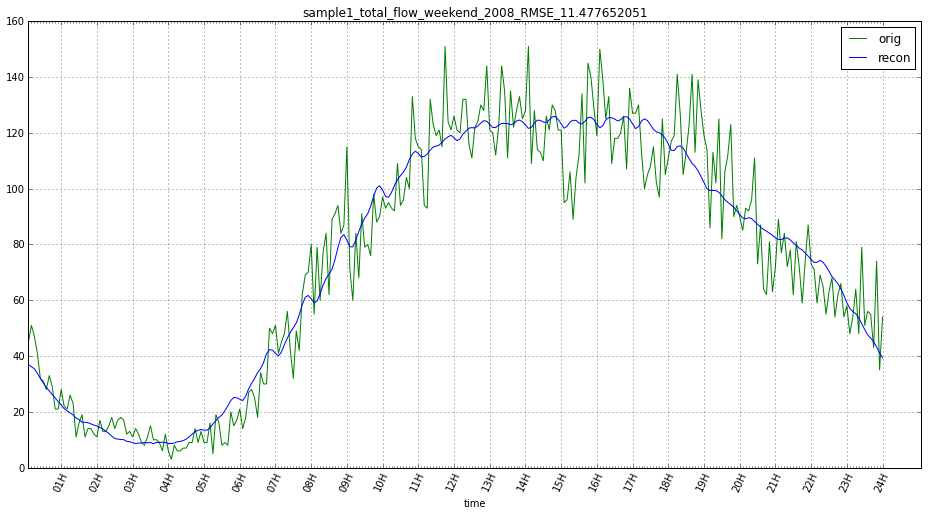

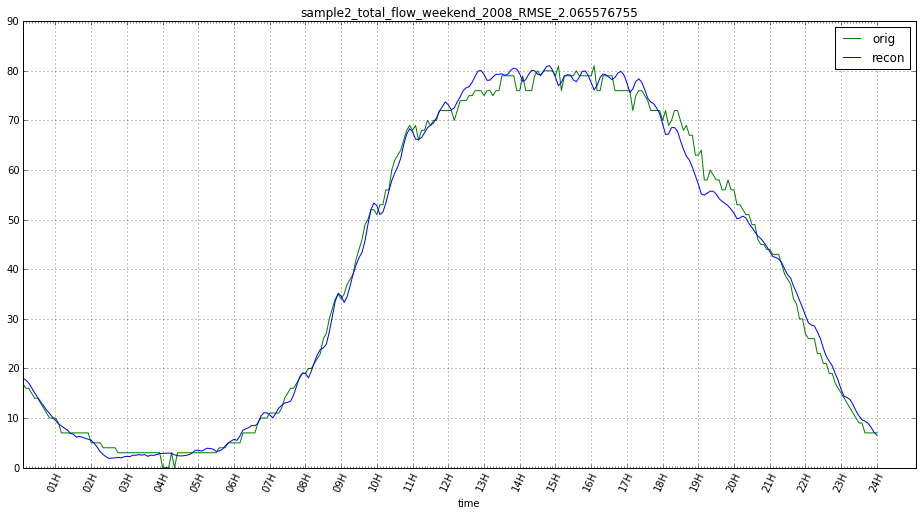

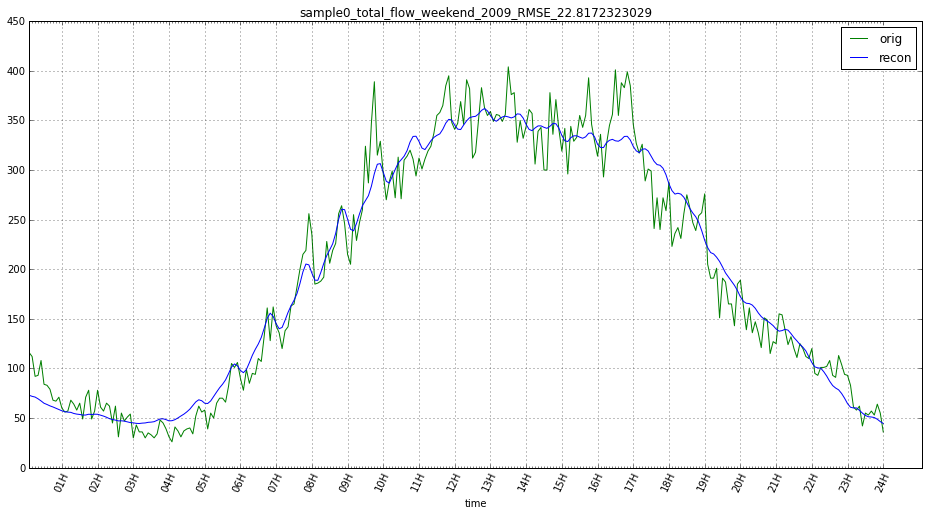

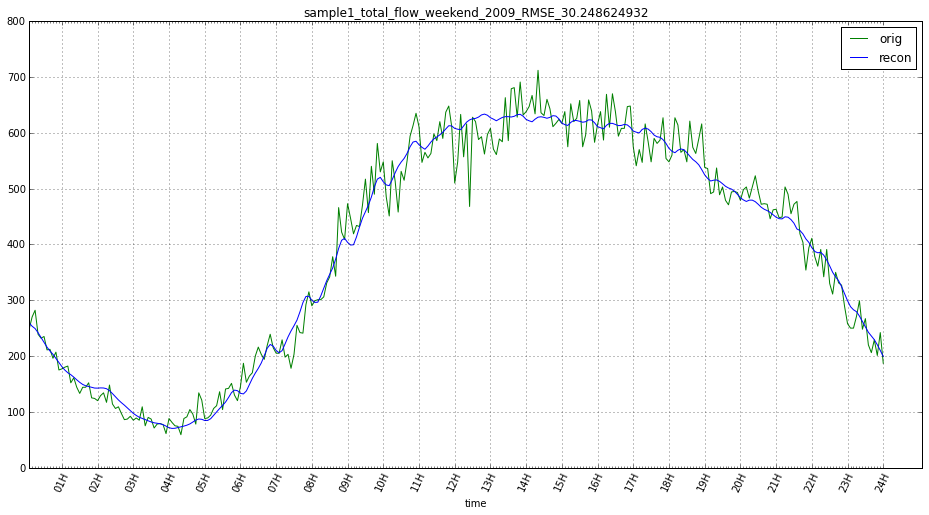

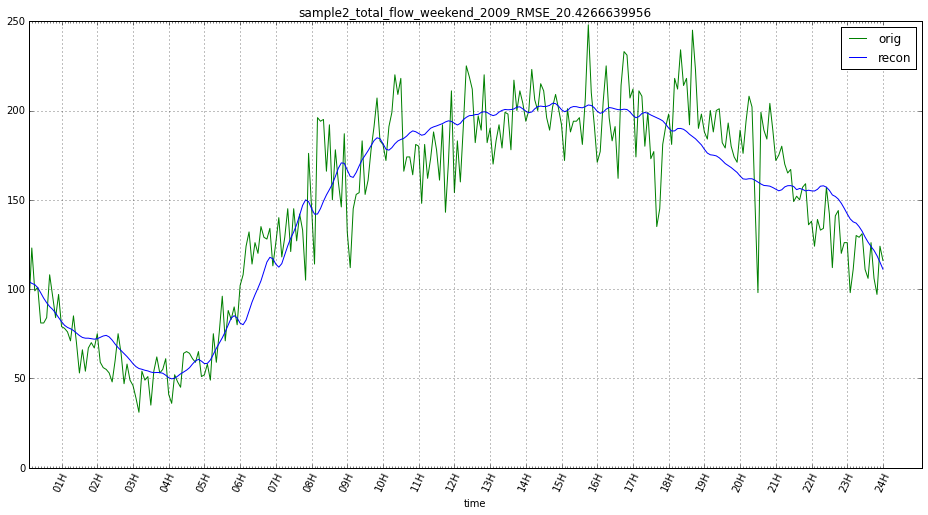

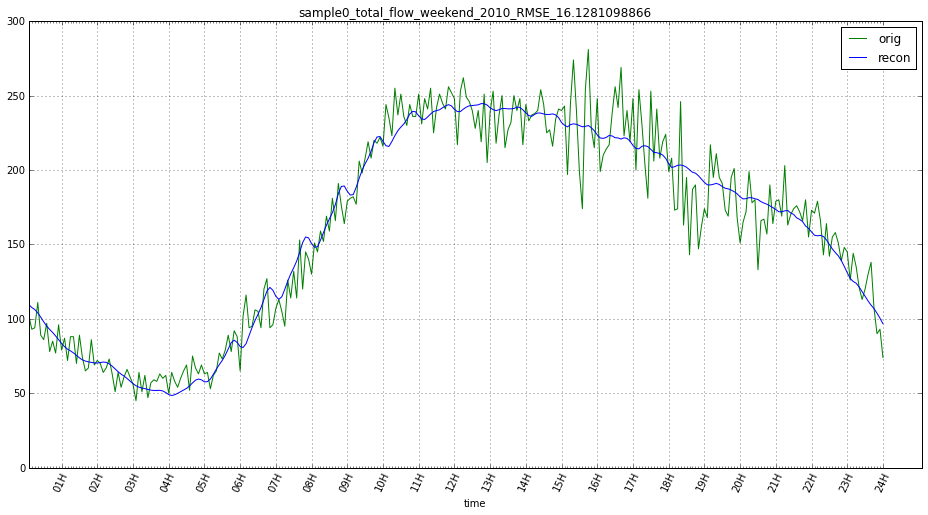

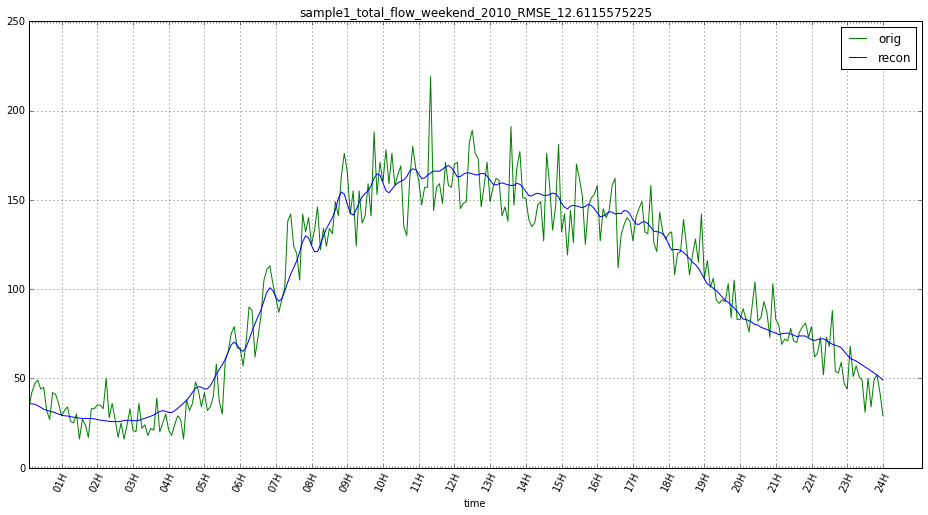

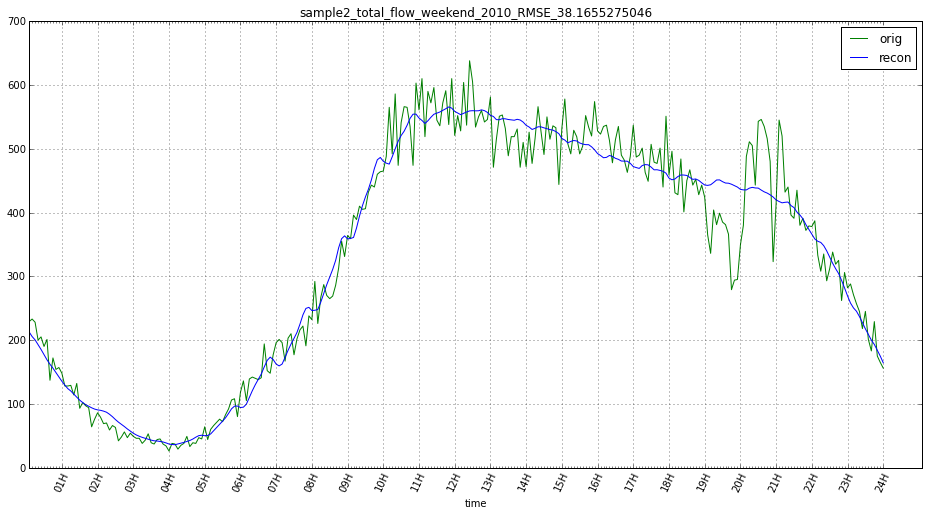

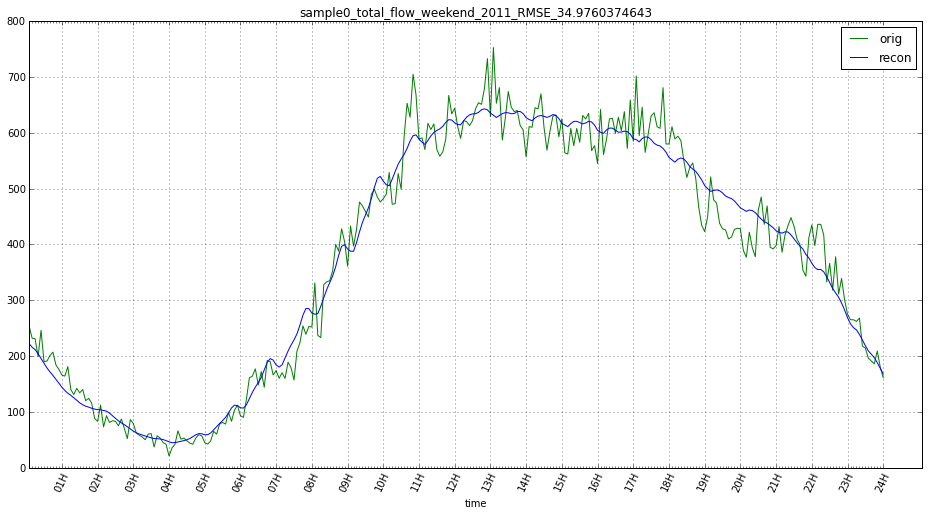

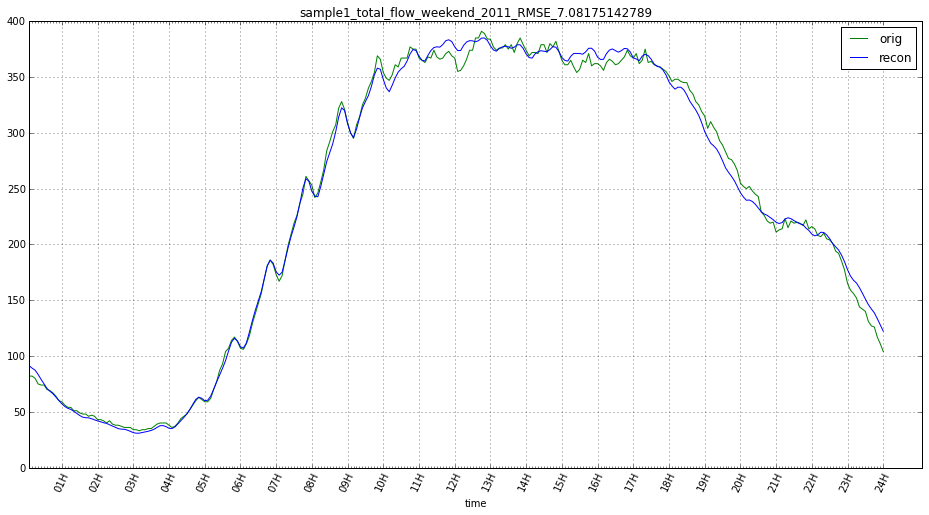

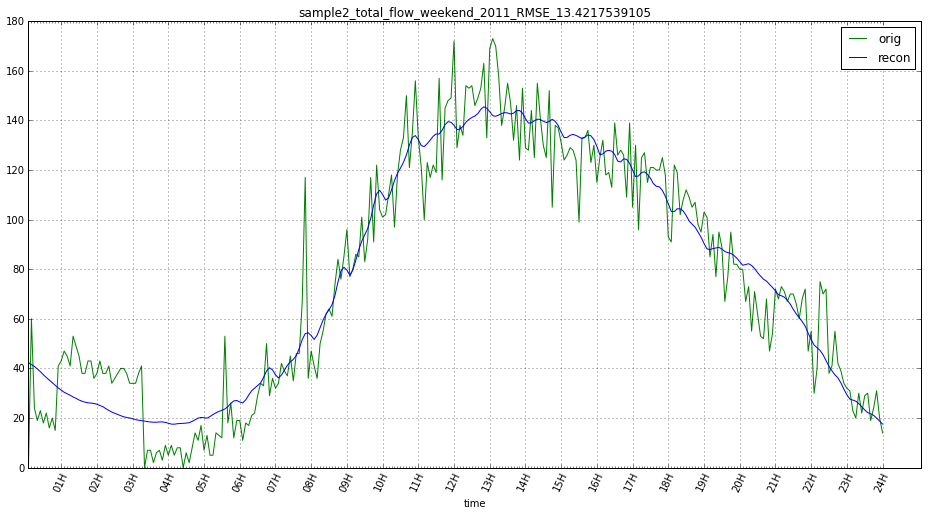

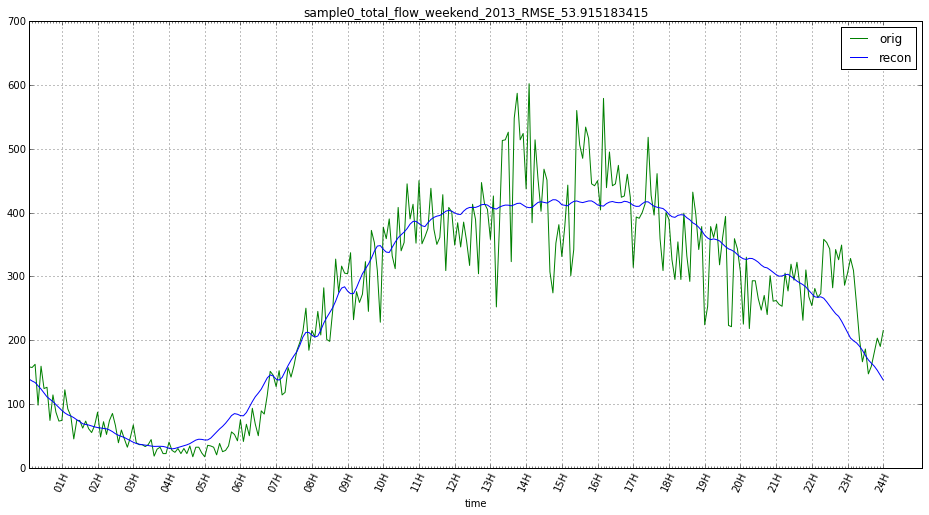

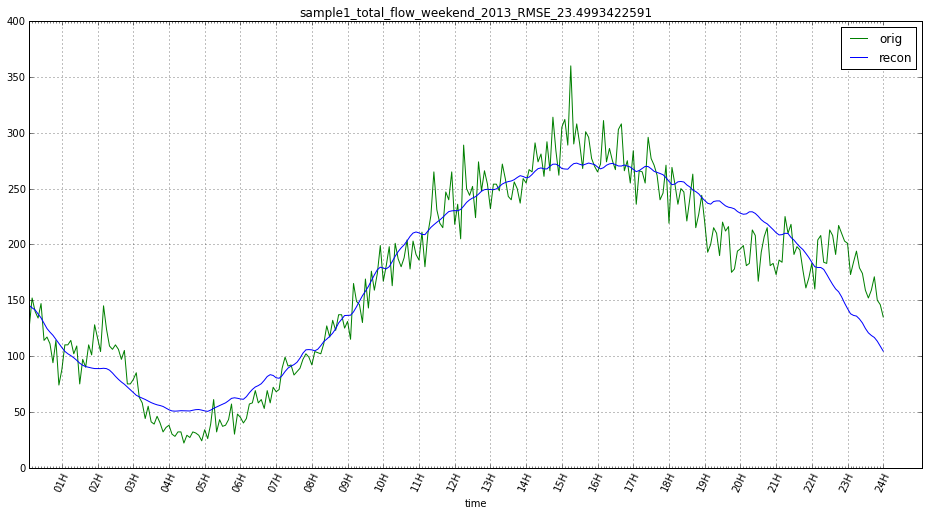

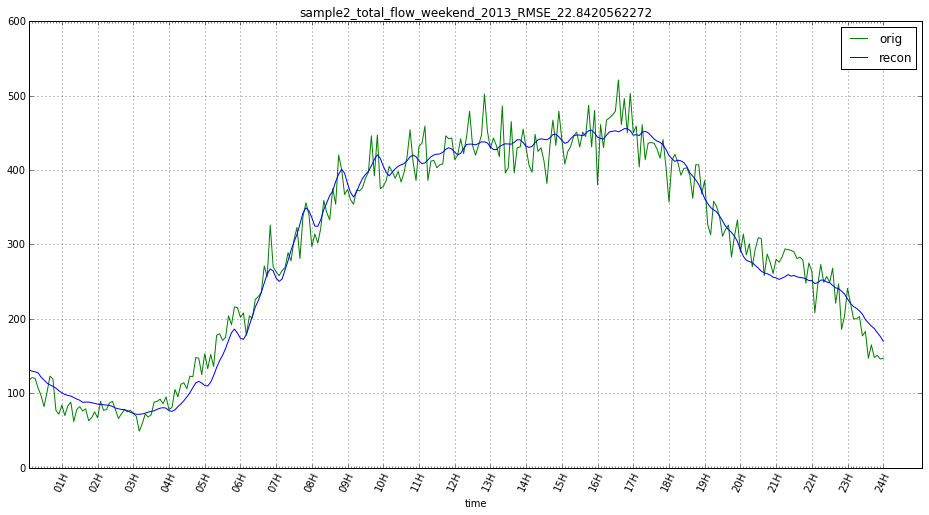

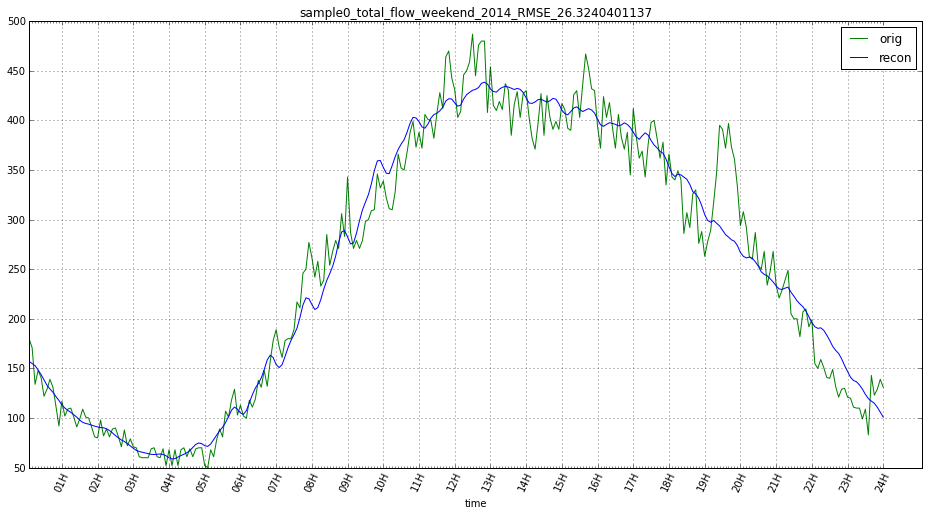

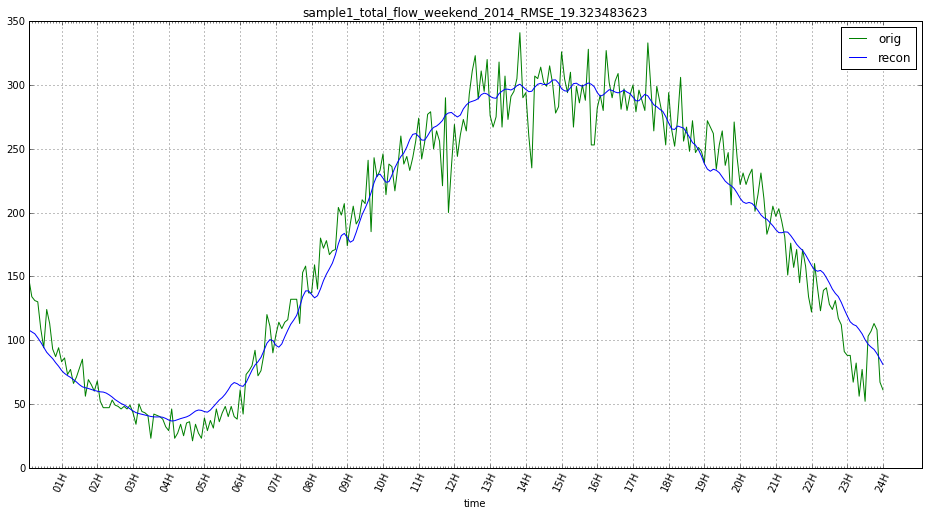

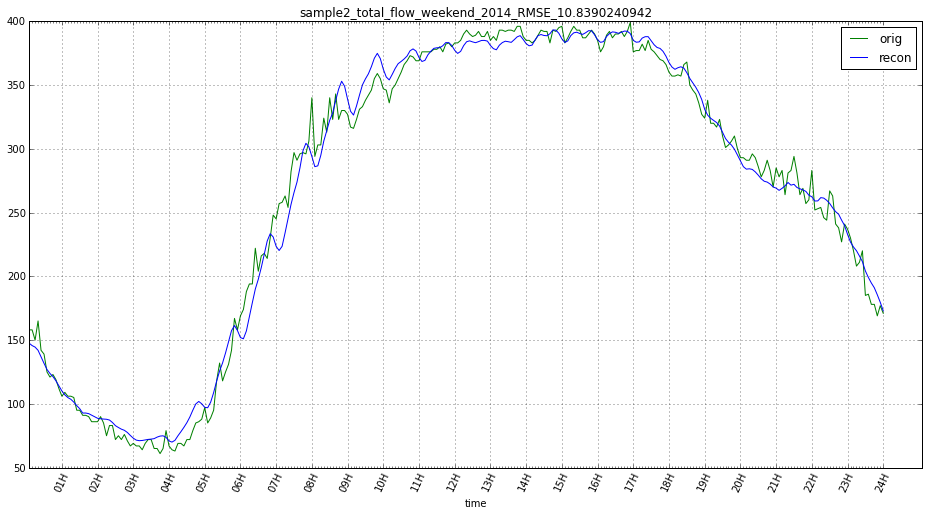

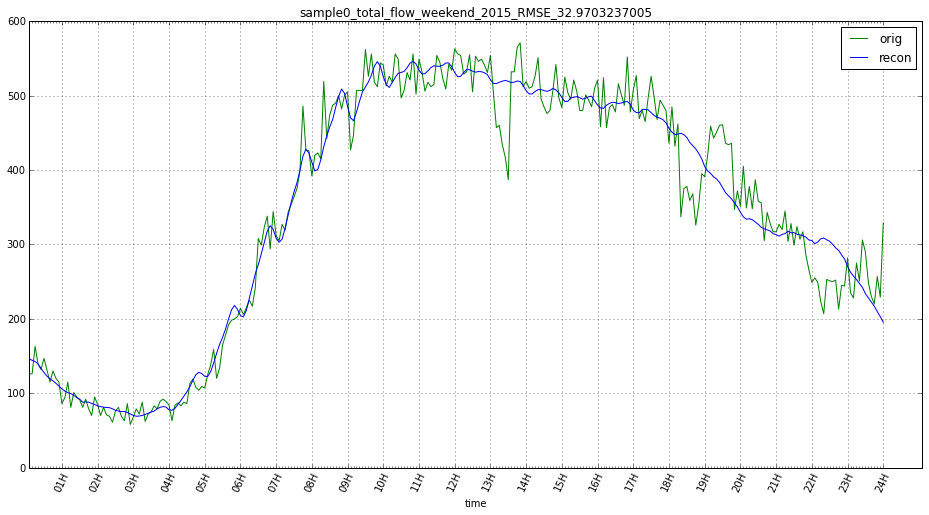

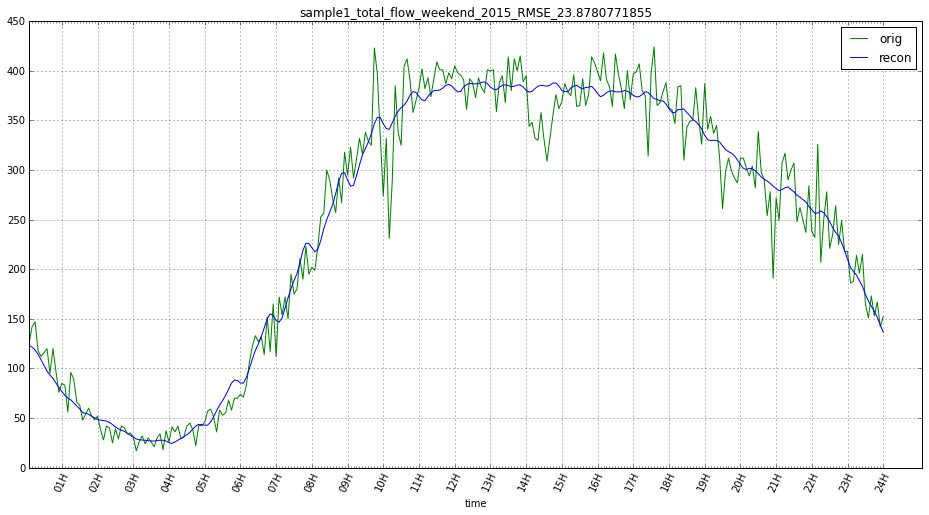

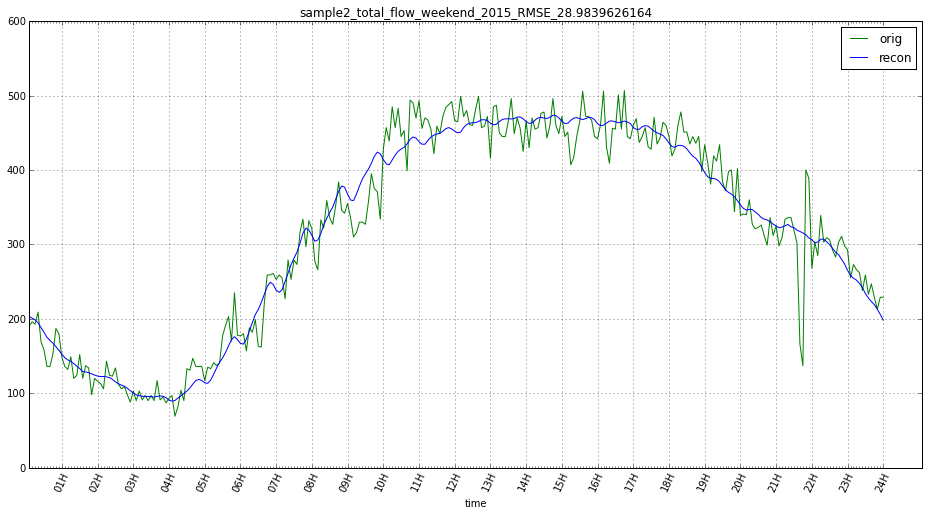

In [10]:
for p in partitions:
    for y in years:
        mean = pd.read_csv(base_mean_path.format(p, p, y), header=None).values[0]
        eigs = pd.read_csv(base_eigs_path.format(p, p, y), header=None).values  # eigenvectors per row matrix (5 X 288)
        samples_df= pd.read_csv(base_samples_path.format(p, p, y), header=None)
        #
        for i, a_row in samples_df.iterrows():
            arr= a_row.values
            label_format= 'sample{}_total_flow_{}_{}'.format(i, p, y)
            display_reconstruction(eigs, mean, arr, label_format)
            if i == 2:
                break

In [18]:
a_df= pd.read_csv('./data/regression/trim_2008_wkday.csv', header=0)
a_df= a_df[a_df.FWY_NUM == 5]
a_df

S_ID  NUM_LANES    LEN  URBAN       DENSITY  FWY_NUM  FWY_DIR  \
18593      340          4  0.225      1    774.428619        5        1   
18594      340          4  0.225      1    774.428619        5        1   
18595      340          4  0.225      1    774.428619        5        1   
18596      340          4  0.225      1    774.428619        5        1   
18597      340          4  0.225      1    774.428619        5        1   
18598      340          4  0.225      1    774.428619        5        1   
18599      340          4  0.225      1    774.428619        5        1   
18600      340          4  0.225      1    774.428619        5        1   
18601      340          4  0.225      1    774.428619        5        1   
18602      340          4  0.225      1    774.428619        5        1   
18603      340          4  0.225      1    774.428619        5        1   
18604      340          4  0.225      1    774.428619        5        1   
18605      340          4  0.225      1    774.428619        5        1   
18606      340          4  0.225      1    774.428619        5        1   
18607      340          4  0.225      1    774.428619        5        1   
18608      340          4  0.225      1    774.428619        5        1   
18609      340          4  0.225      1    774.428619        5        1   
18610      340          4  0.225      1    774.428619        5        1   
18611      340          4  0.225      1    774.428619        5        1   
18612      340          4  0.225      1    774.428619        5        1   
18613      340          4  0.225      1    774.428619        5        1   
18614      340          4  0.225      1    774.428619        5        1   
18615      340          4  0.225      1    774.428619        5        1   
18616      340          4  0.225      1    774.428619        5        1   
18617      340          4  0.225      1    774.428619        5        1   
18618      340          4  0.225      1    774.428619        5        1   
18619      340          4  0.225      1    774.428619        5        1   
18620      340          4  0.225      1    774.428619        5        1   
18621      340          4  0.225      1    774.428619        5        1   
18622      340          4  0.225      1    774.428619        5        1   
...        ...        ...    ...    ...           ...      ...      ...   
1404260  39923          4  0.323      1  15330.670930        5        1   
1404261  39923          4  0.323      1  15330.670930        5        1   
1404262  39923          4  0.323      1  15330.670930        5        1   
1404263  39923          4  0.323      1  15330.670930        5        1   
1404264  39923          4  0.323      1  15330.670930        5        1   
1404265  39923          4  0.323      1  15330.670930        5        1   
1404266  39923          4  0.323      1  15330.670930        5        1   
1404267  39923          4  0.323      1  15330.670930        5        1   
1404268  39923          4  0.323      1  15330.670930        5        1   
1404269  39923          4  0.323      1  15330.670930        5        1   
1404270  39923          4  0.323      1  15330.670930        5        1   
1404271  39923          4  0.323      1  15330.670930        5        1   
1404272  39923          4  0.323      1  15330.670930        5        1   
1404273  39923          4  0.323      1  15330.670930        5        1   
1404274  39923          4  0.323      1  15330.670930        5        1   
1404275  39923          4  0.323      1  15330.670930        5        1   
1404276  39923          4  0.323      1  15330.670930        5        1   
1404277  39923          4  0.323      1  15330.670930        5        1   
1404278  39923          4  0.323      1  15330.670930        5        1   
1404279  39923          4  0.323      1  15330.670930        5        1   
1404280  39923          4  0.323      1  15330.670930        5        1   
1404281  39923          4  0.323   

In [19]:
v= sorted(a_df.S_ID.unique())
v_dict= {i:i for i in v}
v_dict

{340: 340,
 342: 342,
 343: 343,
 345: 345,
 346: 346,
 348: 348,
 349: 349,
 351: 351,
 352: 352,
 353: 353,
 354: 354,
 355: 355,
 356: 356,
 357: 357,
 360: 360,
 361: 361,
 363: 363,
 1169: 1169,
 1170: 1170,
 1840: 1840,
 1841: 1841,
 1842: 1842,
 1843: 1843,
 1844: 1844,
 1845: 1845,
 3696: 3696,
 3697: 3697,
 3698: 3698,
 3699: 3699,
 3700: 3700,
 3701: 3701,
 3702: 3702,
 3705: 3705,
 3708: 3708,
 3709: 3709,
 3710: 3710,
 3713: 3713,
 3715: 3715,
 3716: 3716,
 3717: 3717,
 3719: 3719,
 3720: 3720,
 3721: 3721,
 3722: 3722,
 3723: 3723,
 3724: 3724,
 3725: 3725,
 3727: 3727,
 3729: 3729,
 3730: 3730,
 3731: 3731,
 3732: 3732,
 3734: 3734,
 3735: 3735,
 3736: 3736,
 3738: 3738,
 3739: 3739,
 3740: 3740,
 3741: 3741,
 3742: 3742,
 3743: 3743,
 3744: 3744,
 4510: 4510,
 4511: 4511,
 4512: 4512,
 4513: 4513,
 4515: 4515,
 4516: 4516,
 4688: 4688,
 4689: 4689,
 4690: 4690,
 4691: 4691,
 4692: 4692,
 4693: 4693,
 4694: 4694,
 4695: 4695,
 4696: 4696,
 5267: 5267,
 5268: 5268,
 5511: 

In [12]:
desired_columns= ['Flow_Coef_{}'.format(i) for i in xrange(1, 6)]
f_df= a_df[a_df.FWY_NUM == 5][desired_columns]
f_df

Flow_Coef_1  Flow_Coef_2  Flow_Coef_3  Flow_Coef_4  Flow_Coef_5
18593     654.603661   186.235875  -322.058008  -199.580481    70.504291
18594   -1525.307985  -503.538607  1125.363568  -213.324728   807.872680
18595   -1717.629184  -494.130556  1111.468403  -235.925461   666.392853
18596   -1666.831121  -376.949743  1064.377648  -254.414606   678.338015
18597   -1371.705438  -710.219770  1226.188315  -352.739723   823.391952
18598   -1534.805338  -760.124390  1255.806877  -298.862888   801.236896
18599   -1556.288530  -573.863853  1094.005299  -316.180471   833.408678
18600   -1754.410551  -668.612685  1212.148200  -268.625069   771.890228
18601   -1992.261871  -652.123318   994.480575   -97.974202   659.782534
18602   -1214.956128  -268.269104   840.934572  -237.881708   479.455152
18603    -671.502678  -180.005940   477.438949  -132.873995   330.017803
18604    -671.502678  -180.005940   477.438949  -132.873995   330.017803
18605   -1571.114116  -516.509738  1065.650792  -252.173339   719.800122
18606   -1718.385764  -493.473959  1070.035466  -216.847006   634.082770
18607   -2115.053084  -650.065771  1025.349576   -97.181194   497.034145
18608   -1323.276381  -325.918609   945.145255  -232.260418   591.276403
18609   -1639.489447  -743.706860  1335.132519  -354.574117   694.440545
18610   -1294.721007  -943.574570  1410.077690  -412.710312   364.539396
18611   -1546.413926  -681.435273  1215.695234  -256.576895   650.138812
18612   -1819.236217  -620.459383   995.899908  -106.414778   560.922384
18613   -1220.484623  -312.570025   951.621967  -270.135246   588.121854
18614   -1287.193680  -750.488663  1169.517915  -308.422210   683.328596
18615   -1287.193680  -750.488663  1169.517915  -308.422210   683.328596
18616   -1745.868318  -716.923851  1305.916611  -313.594131   755.081007
18617   -1905.323660  -703.229211  1252.793794  -253.634197   649.841104
18618   -2107.384347  -708.558966  1034.091595   -79.840946   535.702908
18619   -1510.200605  -738.513277  1310.878042  -343.971644   777.866423
18620   -1636.709262  -688.277677  1274.920606  -310.697640   767.652437
18621   -1716.557562  -661.984374  1272.107275  -325.662520   766.438571
18622   -1803.975378  -708.947351  1193.157081  -242.597025   680.555108
...              ...          ...          ...          ...          ...
1404260 -1321.006274 -2216.134170   616.761651  -198.776909  -536.924184
1404261 -1321.006274 -2216.134170   616.761651  -198.776909  -536.924184
1404262 -1549.610124  -543.230263  -354.231390   453.939790  -277.392737
1404263 -2047.575545  -479.815480   175.155344   -94.123093  -116.376113
1404264 -1658.772251 -1470.753752  1146.697332  -777.332856   204.977807
1404265 -1750.994300 -1406.926247  1244.513625  -625.115728   396.590766
1404266 -1750.994300 -1406.926247  1244.513625  -625.115728   396.590766
1404267 -1797.562761 -1541.211216  1279.229043  -625.936051   349.658893
1404268 -1983.208566 -1484.425710  1101.293995  -521.320378   353.284049
1404269 -2524.866735 -1526.113804   536.386857   -55.512986   265.276242
1404270 -1781.278344 -1582.370959  1233.962106  -754.331650   369.044365
1404271 -1891.667781 -1461.417927  1163.729046  -674.121850   282.676885
1404272 -1891.667781 -1461.417927  1163.729046  -674.121850   282.676885
1404273 -1936.548128 -1469.201005  1022.783798  -604.988403   246.513724
1404274 -1767.718041 -1617.884080   921.130350  -312.935807   159.931302
1404275 -2105.238131 -1661.769420   629.129881  -170.838761   340.814126
1404276  -982.233606  -950.993611   810.888065  -569.450757   264.770254
1404277  -982.233606  -950.993611   810.888065  -569.450757   264.770254
1404278 -1886.118858 -1428.754517  1187.371986  -546.203691   282.956999
1404279  -535.785108  -801.357675   508.126388  -348.612118   248.075163
1404280 -2072.942569 -1503.284703  1094.883995  -338.802434   254.521872
1404281 -2233.462152 -1642.907064   808.408686  -241.718214    83.105674
1404282 -1745.117893 -1129.137684   882.473238  -616.580175   309.5

In [13]:
f_avg= f_df.mean(axis=0).values
f_avg

array([-1524.1057713 ,  -926.35874329,   928.17499235,  -262.57086158,
         536.20178547])

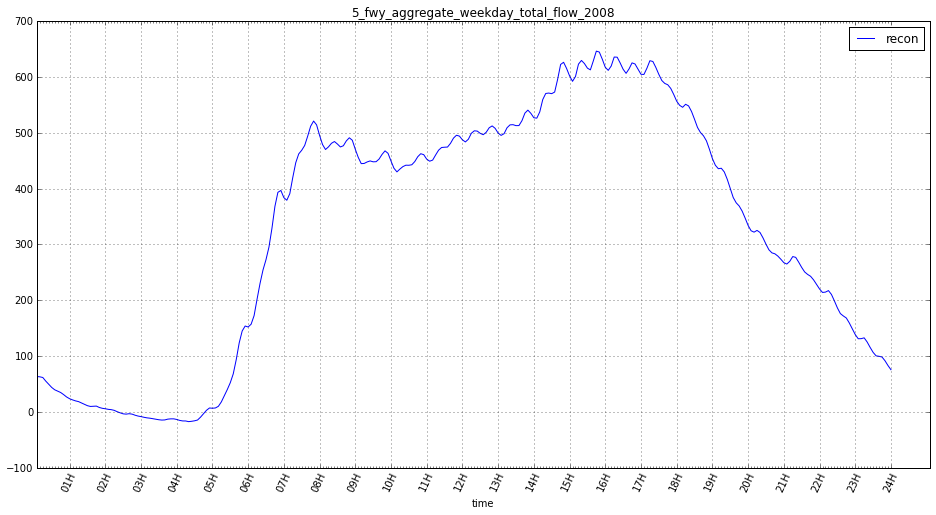

In [14]:
base_mean_path= './data/{}/total_flow_{}_mean_vector.pivot_{}_grouping_pca_tmp.csv'
base_eigs_path= './data/{}/total_flow_{}_eigenvectors.pivot_{}_grouping_pca_tmp.csv'
#
p= 'weekday'
y= 2008
mean = pd.read_csv(base_mean_path.format(p, p, y), header=None).values[0]
eigs = pd.read_csv(base_eigs_path.format(p, p, y), header=None).values

label= '5_fwy_aggregate_{}_total_flow_{}'.format(p, y)
display_reconstruction_from_projection(eigs, mean, f_avg, label)